In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.image as mpimg 


In [41]:
def segement_image_with_kmeans(img, num_colors):
    '''
    This function runs a kmeans algorithm on a colored image.
    It does that by reshaping the 3 dimentional matrix array of the image pixels into 2d array which contains
    the three colors in its columns and in its rows the pixels.
    Then it runs a kmeans algorithm on the transformed array and puts the centroids values in a new array by the 
    original pixels
    '''
    img_width = img.shape[0]
    img_height = img.shape[1]
    img = np.reshape(img,(img_width*img_height,3))
    kmeans = KMeans(n_clusters=num_colors, random_state=42).fit(img)
    X_segments = np.zeros((img_width*img_height,3))
    i = 0
    for point_cluster in kmeans.labels_:
        X_segments[i,:] = kmeans.cluster_centers_[point_cluster]
        i += 1
    img_segmented = np.reshape(X_segments,(img_width,img_height,3))
    return img_segmented

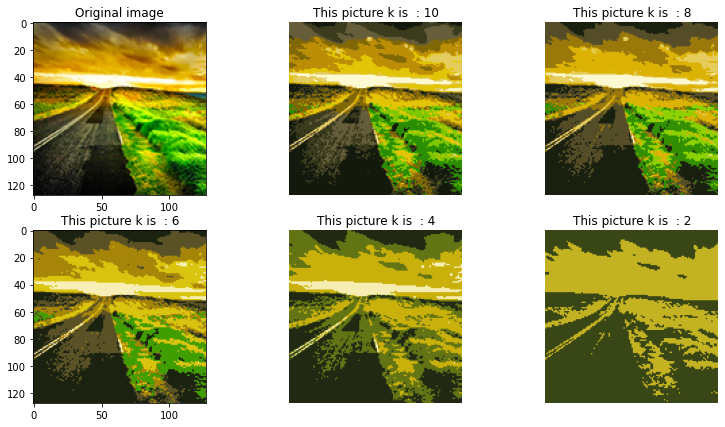

In [51]:
#Prints the pictures to the screen by number of clusters
k_vec = [10,8,6,4,2]
img = mpimg.imread(r"C:\Users\bboyc\Downloads\images\road.png") #Add Image path here.
f,axarr = plt.subplots(2,3)
f.set_size_inches(13,7)
for i in range(1,3):
    axarr[0,0].imshow(img,cmap="binary")
    axarr[0,0].set_title('Original image')
    axarr[0,i].imshow(segement_image_with_kmeans(img, k_vec[i-1]),cmap="binary")
    axarr[0,i].set_title('This picture k is  : ' +str(k_vec[i-1]))
    axarr[0,i].axis("off")
    axarr[1,0].imshow(segement_image_with_kmeans(img, k_vec[2]),cmap="binary")
    axarr[1,0].set_title('This picture k is  : ' +str(k_vec[i]))
    axarr[1,i].imshow(segement_image_with_kmeans(img, k_vec[i+2]),cmap="binary")
    axarr[1,i].set_title('This picture k is  : ' +str(k_vec[i+2]))
    axarr[1,i].axis("off")
plt.show()